In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

In [200]:
df=pd.read_csv("worldometer_data.csv")

In [201]:
df=df.drop(['Country/Region','Tot Cases/1M pop','Deaths/1M pop','Tests/1M pop','WHO Region'],axis=1)

In [202]:
df=df.groupby('Continent').sum()
df1=df.copy()
df1.TotalCases=df.TotalCases.astype("int")+df.NewCases.astype("int")
df1.TotalRecovered=df.TotalRecovered.astype("int")+df.NewRecovered.astype("int")
df1.TotalDeaths=df.TotalDeaths.astype("int")+df.NewDeaths.astype("int")
df1=df1.drop(['NewCases','NewRecovered','NewDeaths'],axis=1)
df1["CovidTestPercentage"]=(df1.TotalTests.astype("float")/df1.Population.astype("float"))*100
df1["CovidTestPositivePercentage"]=(df1.TotalCases.astype("float")/df1.TotalTests.astype("float"))*100
df1["DeathPercentage"]=(df1.TotalDeaths.astype("float")/(df1.TotalCases.astype("float")-df1.ActiveCases.astype("float")))*100
df1["ActiveCaseSeverity"]=(df1["Serious,Critical"].astype("float")/df1.ActiveCases.astype("float"))*100
df1
# Here I added the new cases to the total cases so that the values become updated upto the time this data was taken. 

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotalTests,CovidTestPercentage,CovidTestPositivePercentage,DeathPercentage,ActiveCaseSeverity
Continent,,,,,,,,,,,
Africa,1.343515e+09,1011867,22114,693620,296133.0,1187.0,8673853.0,0.645609,11.665715,3.089695,0.400833
Asia,3.173656e+09,4689814,100628,3508212,1080997.0,18749.0,65353821.0,2.059259,7.176036,2.788393,1.734417
Australia/Oceania,4.095791e+07,21735,281,12620,8834.0,52.0,5152811.0,12.580747,0.421809,2.178126,0.588635
Europe,7.476775e+08,2982576,205232,1587302,475261.0,5200.0,96125611.0,12.856560,3.102790,8.185330,1.094136
North America,5.895035e+08,5925829,230674,3155818,2537676.0,25709.0,70173584.0,11.903846,8.444529,6.808252,1.013092
South America,4.311105e+08,4544555,154965,3117086,1272238.0,14295.0,22379618.0,5.191156,20.306669,4.735635,1.123611


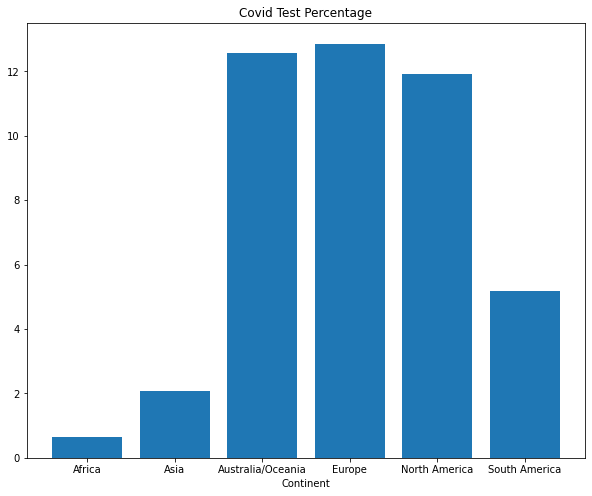

In [203]:
m = df1.index
c1 = df1.CovidTestPercentage
fig = mp.figure(figsize =(10,8))
mp.bar(m,c1)
mp.xlabel('Continent')
mp.title('Covid Test Percentage')
mp.show()
#Ratio(%) of Total Tests Vs Total Population

Ratio(%) of Total Tests Vs Total Population

Here we compare the total number of tests done with the total population done
We can see that Asia, Africa and South America had quite a low testing percentage when compared to the other continents.
This can be due to:-

1) Inadequate testing- People in these places didnt get proper access to testing facilities. It can happen due to:-  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; a) Lack of testing equipment or qualified professional.  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; b) Inaccessibilty of testing centres.  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; c) Unaffordability of testing procedure.  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; d) Social or personal apprehension towards testing.  
        
2) Lower demand for testing- People in these places were less exposed to the virus due to absence of intense connectivity.  

Europe had the highest tests vs population ratio.  
Africa had the lowest tests vs population ratio.  

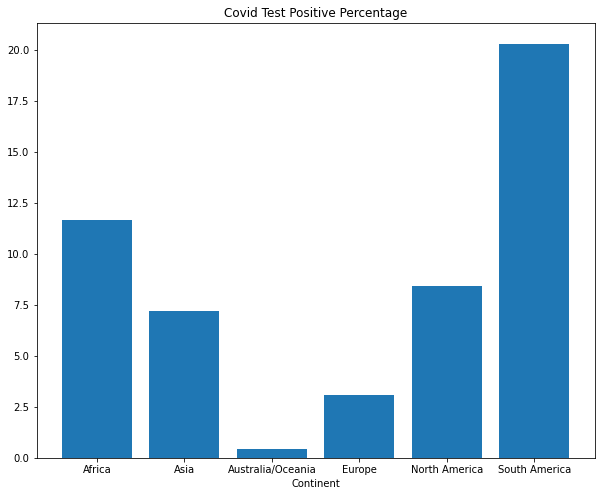

In [204]:
m = df1.index
c1 = df1.CovidTestPositivePercentage
fig = mp.figure(figsize =(10,8))
mp.bar(m,c1)
mp.xlabel('Continent')
mp.title('Covid Test Positive Percentage')
mp.show()
#Ratio(%) of Total Cases Vs Total Tests Done

Ratio(%) of Total Cases Vs Total Tests Done

Here we compare the total number of cases with the total number of tests done instead of with the total population because we do not have data about the untested population, so it is more accurate to graph the Test Positive Percentage for the tested population.

From this graph we can see that even though Asia, Africa and South America had a lower testing percentage, they had a higher test positive percentage, which indicates that the people in these places were more vulnerable to the disease. This can be due to:-

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; 1) Malnourishment- This could result in lower immunity which can make people more susceptible to catching the disease.  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; 2) Poor Hygiene- This could result in inceased transmission of the disease.  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; 3) Asia has a huge population, especially in cities. High population density can increase the chances of transmission.  

Australia/Oceania has a very low test positive rate. It can be because the people in these places were less exposed to the virus due to absence of intense connectivity.  
South America had the highest ratio of Covid-positive vs total tests.  

Text(0.5, 1.0, 'Covid Death Percentage')

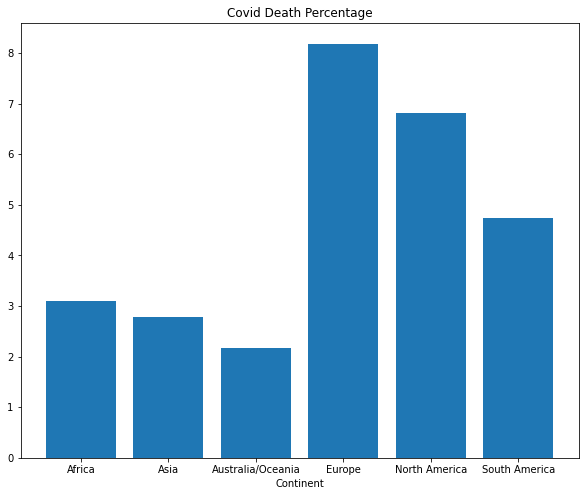

In [205]:
m = df1.index
c1 = df1.CovidTestPositivePercentage
c2 = df1.DeathPercentage
fig = mp.figure(figsize =(10,8))
mp.bar(m,c2)
mp.xlabel('Continent')
mp.title('Covid Death Percentage')
# Ratio(%) of Total Deaths Vs Total InActive Cases

Ratio(%) of Total Deaths Vs Total Inactive Cases (i.e. Total Cases - Total Active Cases)

Here we compare the total number of deaths with the total number of inactive done instead of with the total number of tests done because we do not have data about the active cases(i.e. we do not know whether they recover or not), so it is more accurate to graph the Death Percentage for the inactive cases.

From this graph we can see that even though Europe and North America had a lower test positive percentage, they have a higher death percentage, which indicates that the cases in these places were more severe. This can be due to:-

1) Overburdening of health-care services- This could happen if the health-care services in these places were underprepared or if the number of cases were much higher than expect.  
2) Unaffordability of health-care services- This could happen if the treatment cost was very high in these places.  
3) An unexpectedly high number of cases can happen if proper precautions were not taken or were disobeyed by the people.  

Australia/Oceania has the lowest death rate. It can be because the people in these places were less exposed to the virus due to absence of intense connectivity and thus the cases were less severe.  
Europe has the highest percentage of deaths.

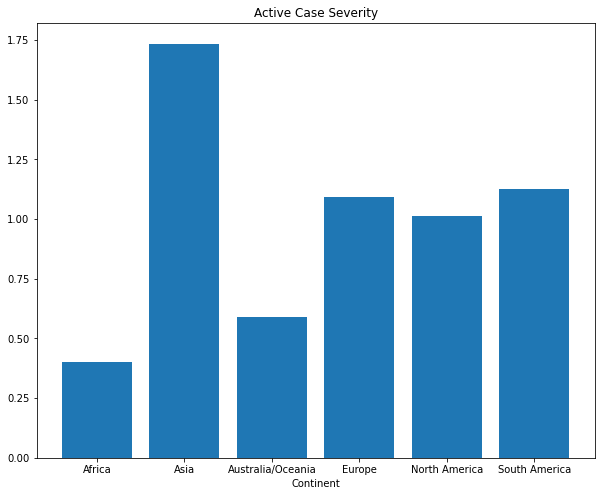

In [206]:
m = df1.index
c1 = df1.ActiveCaseSeverity
fig = mp.figure(figsize =(10,8))
mp.bar(m,c1)
mp.xlabel('Continent')
mp.title('Active Case Severity')
mp.show()
#Ratio(%) of Total Cases Vs Total Tests Done

Ratio(%) of Serious/Critical Cases Vs Total Active Cases

Here we compare the total number of Serious/Critical cases with the total number of active cases.

From this graph we can see the severity of Covid-19 remains the highest in Asia.